In [1]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import LabelEncoder

import nltk

import re

from nltk.corpus import stopwords

from nltk. stem import PorterStemmer

from sklearn. feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle

import seaborn as sns

In [2]:
import pandas as pd 
dataset = pd.read_csv("pop.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1001 non-null   object
 1   sentiment  1001 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [4]:
dataset.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
dataset.shape

(1001, 2)

In [6]:
dataset.describe()

,review,sentiment
count,1001,1001
unique,1001,2
top,This movie was extremely boring. I only laughe...,positive
freq,1,502


In [7]:
dataset['sentiment'].value_counts()

positive    502
negative    499
Name: sentiment, dtype: int64

In [8]:
dataset['review'].value_counts()

This movie was extremely boring. I only laughed a few times. I decided to rent it when I noticed William Shatner's name on the cover. It's all about this little kid who gets picked on all the time by his classmates. When wandering the streets looking for old ladies to assist, he meets a prostitute. She takes him to a club called the Playground, where he befriends several pimps. When mayor Tony Gold (Shatner) decides to take over the pimp business, Lil' Pimp must lay down for his homies.<br /><br />The animation isn't very good in this. It looks like it was made with Macromedia, which I'm sure it was. It doesn't suck, it's just the sort of choppy flash animation that people have gotten used to over recent years. The humor in this is not very good, I didn't think any of it was funny.                                                                                                                                                                                                                

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

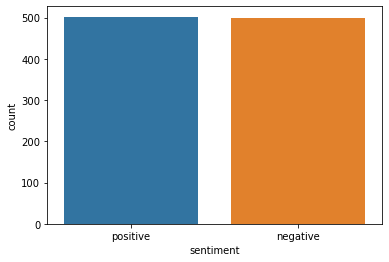

In [9]:
sns.countplot(dataset['sentiment'])

In [10]:
c=dataset.replace(['negative','positive'],[0,1])

In [11]:
c.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [12]:
x=dataset['review']
y=c['sentiment']
y

0       1
1       1
2       1
3       0
4       1
       ..
996     0
997     0
998     0
999     0
1000    1
Name: sentiment, Length: 1001, dtype: int64

In [13]:
c.tail()

,review,sentiment
996,I hated it. I hate self-aware pretentious inan...,0
997,I usually try to be professional and construct...,0
998,If you like me is going to see this in a film ...,0
999,"This is like a zoology textbook, given that it...",0
1000,The movie is good,1


In [14]:
ps = PorterStemmer ()

corpus = []

for i in range (len(x)):

   

    review = re.sub ("[^a-zA-Z]"," ", x[i])

    review = review.lower()
    review = review.split()
    #review = nltk.word_tokenize(review)

    review = [ps.stem(word) for word in review if word not in set (stopwords.words ("english"))]

    review = " ".join(review)

    corpus.append(review)

    

In [15]:
review2 = re.sub ("[^a-zA-Z]"," ", x[0])
review2

'One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me  br    br   The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word  br    br   It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   I would say the main appeal of the show is due to the fa

In [16]:
review2 = review2.lower()
review2

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me  br    br   the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word  br    br   it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   i would say the main appeal of the show is due to the fa

In [17]:
review2 = nltk.word_tokenize(review2)
review2

['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 'oz',
 'episode',
 'you',
 'll',
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me',
 'br',
 'br',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word',
 'br',
 'br',
 'it',
 'is',
 'called',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'fo

In [18]:
review2 = [ps.stem(word) for word in review2 if word not in set (stopwords.words ("english"))]
review2

['one',
 'review',
 'mention',
 'watch',
 'oz',
 'episod',
 'hook',
 'right',
 'exactli',
 'happen',
 'br',
 'br',
 'first',
 'thing',
 'struck',
 'oz',
 'brutal',
 'unflinch',
 'scene',
 'violenc',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'heart',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violenc',
 'hardcor',
 'classic',
 'use',
 'word',
 'br',
 'br',
 'call',
 'oz',
 'nicknam',
 'given',
 'oswald',
 'maximum',
 'secur',
 'state',
 'penitentari',
 'focus',
 'mainli',
 'emerald',
 'citi',
 'experiment',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inward',
 'privaci',
 'high',
 'agenda',
 'em',
 'citi',
 'home',
 'mani',
 'aryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffl',
 'death',
 'stare',
 'dodgi',
 'deal',
 'shadi',
 'agreement',
 'never',
 'far',
 'away',
 'br',
 'br',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goe',
 'show',
 'dare',
 'forget',
 'prett

In [19]:
review2 = " ".join(review2)
review2

'one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch da

In [45]:
corpus[0]

'one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch da

In [21]:
#Term Frequency–Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
X.shape

(1001, 5000)

In [23]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size=0.15 , random_state=101)

In [24]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((850, 5000), (151, 5000), (850,), (151,))

In [25]:
mnb = MultinomialNB()
mnb.fit(X_train , Y_train)

MultinomialNB()

In [26]:
pred = mnb.predict(X_test)

In [27]:
print(accuracy_score(Y_test , pred))
print(confusion_matrix(Y_test , pred))
print(classification_report(Y_test , pred))

0.8211920529801324
[[69  8]
 [19 55]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        77
           1       0.87      0.74      0.80        74

    accuracy                           0.82       151
   macro avg       0.83      0.82      0.82       151
weighted avg       0.83      0.82      0.82       151



In [28]:
pd.DataFrame(np.c_[Y_test , pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0,0
1,1,0
2,1,1
3,0,0
4,0,0
...,...,...
146,1,1
147,1,0
148,0,0
149,0,1


<AxesSubplot:>

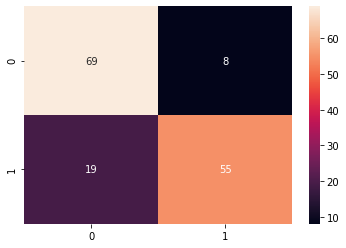

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)

sns.heatmap(cm, annot=True)

In [30]:
pickle.dump(cv , open("count-Vectorizer.pkl" , "wb"))
pickle.dump(mnb , open("Movies_Review_Classification.pkl" , "wb"))  # 1: pos , 0:Neg

In [31]:
save_cv = pickle.load(open('count-Vectorizer.pkl','rb'))
model = pickle.load(open('Movies_Review_Classification.pkl','rb'))

In [32]:
pred = mnb.predict(cv.fit_transform(corpus).toarray())
pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    elif res == 0:
        return 'Negative review'
    else :
        return 'not found'

In [34]:
sen = 'This is the wonderful movie of my life'
res = test_model(sen)
print(res)

Positive review


In [47]:
sen = ' one review mention watch oz episod hook right exactli happen br br first thing unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'
res = test_model(sen)
print(res)

Negative review


In [36]:
sen='thought wonder way spend time hot summer weekend sit air condit theater watch light heart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point risk addict thought proof woodi allen still fulli control style mani us grown love br br laugh one woodi comedi year dare say decad never impress scarlet johanson manag tone sexi imag jump right averag spirit young woman br br may crown jewel career wittier devil wear prada interest superman great comedi go see friend'
res = test_model(sen)
print(res)

Positive review


In [37]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators =40)

clf.fit(X_train,Y_train)


y_pred=clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8145695364238411


In [38]:
pd.DataFrame(np.c_[Y_test , y_pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
146,1,1
147,1,1
148,0,0
149,0,0


<AxesSubplot:>

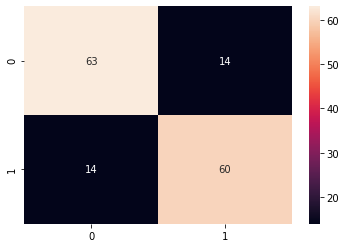

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)


y_pred = knn.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred)*100)

Accuracy: 74.17218543046357


In [41]:
pd.DataFrame(np.c_[Y_test , y_pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,0,0
1,1,1
2,1,0
3,0,0
4,0,1
...,...,...
146,1,0
147,1,0
148,0,0
149,0,1


<AxesSubplot:>

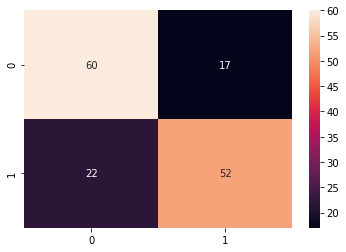

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True)